In [3]:
import pandas as pd
import numpy as np

In [4]:
# Create a date range
dates = pd.date_range("2025-01-01", periods=10, freq="D")

# Create a small DataFrame
df = pd.DataFrame({
    "date": dates,
    "value": np.random.randint(10, 100, size=10)
})

df.head()


,date,value
0,2025-01-01,56
1,2025-01-02,71
2,2025-01-03,61
3,2025-01-04,92
4,2025-01-05,42


In [14]:
df

,value
date,
2025-01-01,56
2025-01-02,71
2025-01-03,61
2025-01-04,92
2025-01-05,42
2025-01-06,44
2025-01-07,88
2025-01-08,40
2025-01-09,95


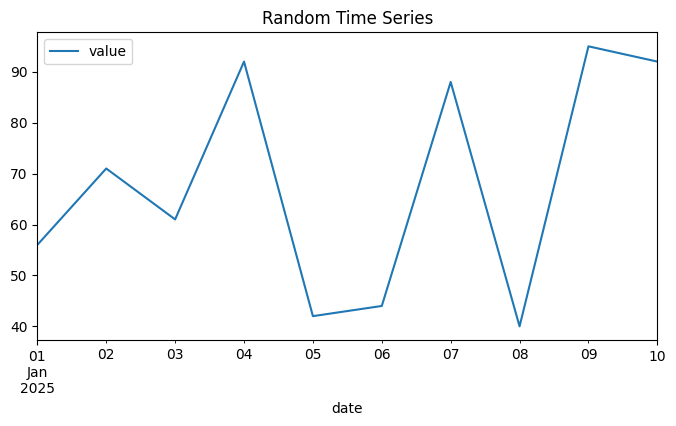

In [6]:
import matplotlib.pyplot as plt

df.plot(figsize=(8,4), title="Random Time Series")
plt.show()


In [15]:
df.resample("W").mean()

,value
date,
2025-01-05,64.4
2025-01-12,71.8


<Axes: xlabel='date'>

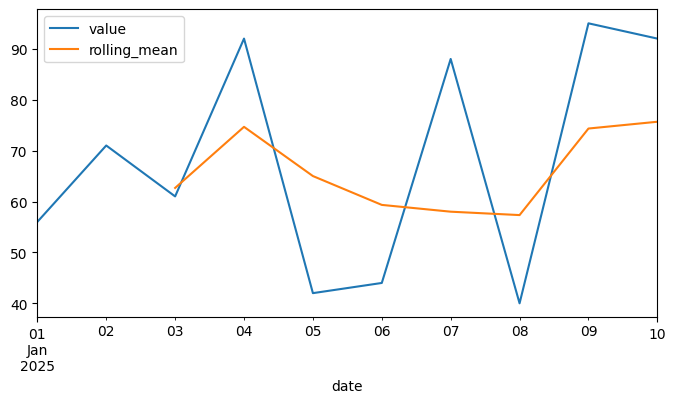

In [16]:
df["rolling_mean"] = df["value"].rolling(window=3).mean()
df[["value", "rolling_mean"]].plot(figsize=(8,4))

In [17]:
df["2025-01-02":"2025-01-05"]

,value,rolling_mean
date,,
2025-01-02,71,NaN
2025-01-03,61,62.666667
2025-01-04,92,74.666667
2025-01-05,42,65.000000


<Axes: title={'center': 'Value Distribution'}, ylabel='Frequency'>

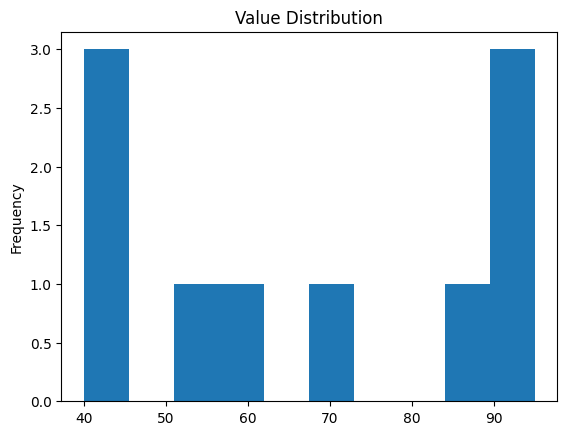

In [18]:
df.describe()
df["value"].plot(kind="hist", bins=10, title="Value Distribution")

            value  rolling_mean
date                           
2025-01-05   64.4     67.444444
2025-01-12   71.8     64.933333


<Axes: title={'center': 'Weekly Average'}, xlabel='date'>

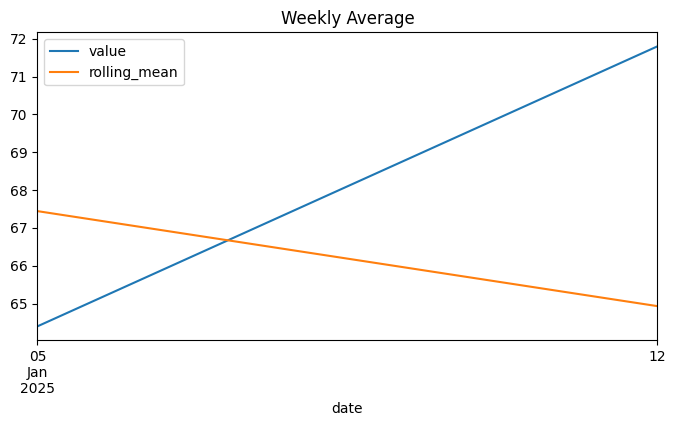

In [19]:
# Resample daily data into weekly average
weekly_mean = df.resample("W").mean()
print(weekly_mean)

# Plot it
weekly_mean.plot(figsize=(8,4), title="Weekly Average")

In [20]:
df.resample("W").max()
df.resample("M").sum()

C:\Users\Ege Bayazıt\AppData\Local\Temp\ipykernel_2480\255538032.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample("M").sum()


,value,rolling_mean
date,,
2025-01-31,681,527.0


In [21]:
# Weekly max
weekly_max = df.resample("W").max()
print(weekly_max)

# Monthly sum (Month End instead of M)
monthly_sum = df.resample("ME").sum()
print(monthly_sum)


            value  rolling_mean
date                           
2025-01-05     92     74.666667
2025-01-12     95     75.666667
            value  rolling_mean
date                           
2025-01-31    681         527.0


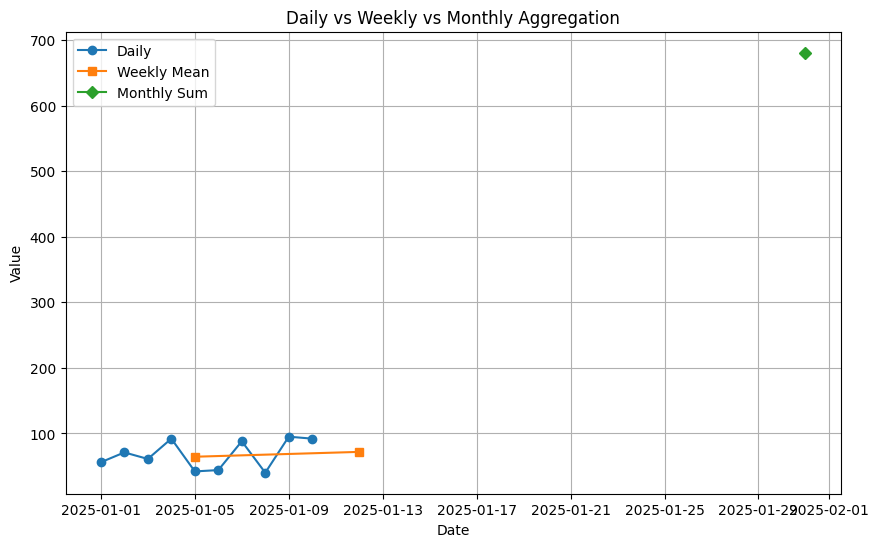

In [22]:
import matplotlib.pyplot as plt

# Daily values
daily = df["value"]

# Weekly mean
weekly = df["value"].resample("W").mean()

# Monthly sum
monthly = df["value"].resample("ME").sum()

# Plot
plt.figure(figsize=(10,6))

plt.plot(daily.index, daily, label="Daily", marker="o")
plt.plot(weekly.index, weekly, label="Weekly Mean", marker="s")
plt.plot(monthly.index, monthly, label="Monthly Sum", marker="D")

plt.title("Daily vs Weekly vs Monthly Aggregation")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
df["previous_day"] = df["value"].shift(1)
df.head()

,value,rolling_mean,previous_day
date,,,
2025-01-01,56,NaN,NaN
2025-01-02,71,NaN,56.0
2025-01-03,61,62.666667,71.0
2025-01-04,92,74.666667,61.0
2025-01-05,42,65.000000,92.0


In [24]:
df["daily_return"] = df["value"].pct_change() * 100
df.head()

,value,rolling_mean,previous_day,daily_return
date,,,,
2025-01-01,56,NaN,NaN,NaN
2025-01-02,71,NaN,56.0,26.785714
2025-01-03,61,62.666667,71.0,-14.084507
2025-01-04,92,74.666667,61.0,50.819672
2025-01-05,42,65.000000,92.0,-54.347826


In [25]:
df

,value,rolling_mean,previous_day,daily_return
date,,,,
2025-01-01,56,NaN,NaN,NaN
2025-01-02,71,NaN,56.0,26.785714
2025-01-03,61,62.666667,71.0,-14.084507
2025-01-04,92,74.666667,61.0,50.819672
2025-01-05,42,65.000000,92.0,-54.347826
2025-01-06,44,59.333333,42.0,4.761905
2025-01-07,88,58.000000,44.0,100.000000
2025-01-08,40,57.333333,88.0,-54.545455
2025-01-09,95,74.333333,40.0,137.500000


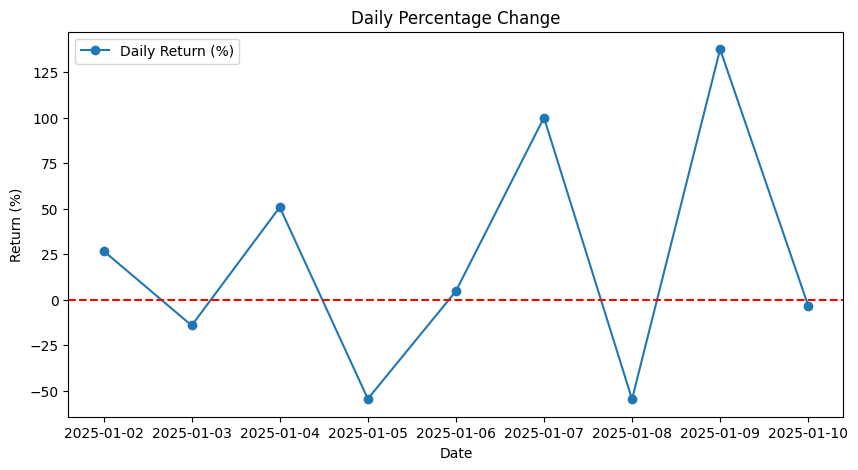

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df.index, df["daily_return"], marker="o", linestyle="-", label="Daily Return (%)")

plt.axhline(0, color="red", linestyle="--")  # zero line
plt.title("Daily Percentage Change")
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.legend()
plt.show()

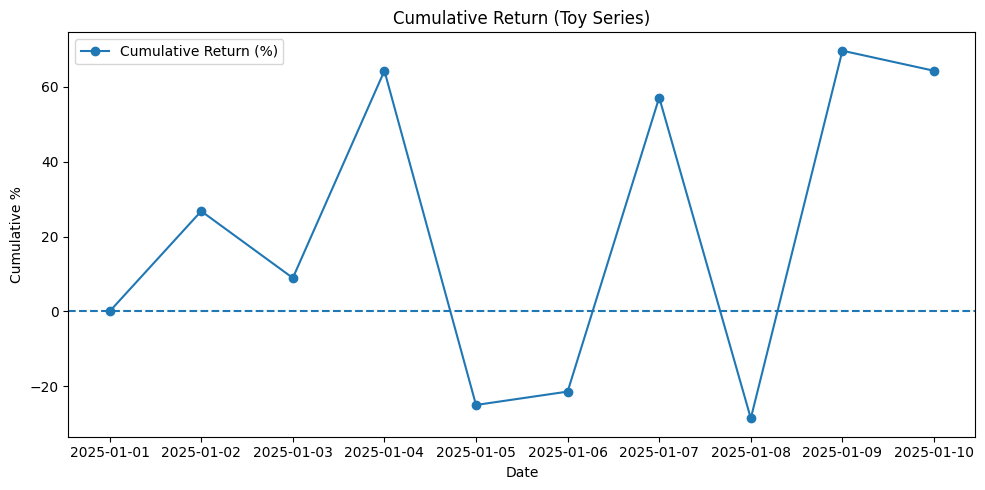

,value,previous_day,daily_return,cum_return
date,,,,
2025-01-01,56,NaN,NaN,0.000000
2025-01-02,71,56.0,26.785714,0.267857
2025-01-03,61,71.0,-14.084507,0.089286
2025-01-04,92,61.0,50.819672,0.642857
2025-01-05,42,92.0,-54.347826,-0.250000
2025-01-06,44,42.0,4.761905,-0.214286
2025-01-07,88,44.0,100.000000,0.571429
2025-01-08,40,88.0,-54.545455,-0.285714
2025-01-09,95,40.0,137.500000,0.696429


In [27]:
# Using the % returns you already computed
df["cum_return"] = (1 + df["daily_return"].fillna(0) / 100.0).cumprod() - 1

# Plot cumulative return (start = 0%)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df.index, df["cum_return"] * 100, marker="o", label="Cumulative Return (%)")
plt.axhline(0, linestyle="--")
plt.title("Cumulative Return (Toy Series)")
plt.xlabel("Date"); plt.ylabel("Cumulative %")
plt.legend(); plt.tight_layout(); plt.show()

df[["value","previous_day","daily_return","cum_return"]]

In [28]:
import pandas as pd, yfinance as yf

TODAY = pd.Timestamp.today().normalize()
START = TODAY - pd.Timedelta(days=120)  # ~90 trading days buffer
TICKERS = ["AAPL", "MSFT"]

raw = yf.download(
    tickers=TICKERS,
    start=START.strftime("%Y-%m-%d"),
    end=(TODAY + pd.Timedelta(days=1)).strftime("%Y-%m-%d"),
    auto_adjust=True,
    progress=False,
    group_by="ticker",
    interval="1d",
)
raw.tail()

Ticker            MSFT                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2025-08-12  523.750000  530.979980  522.700012  529.239990  18667000   
2025-08-13  532.109985  532.700012  519.369995  520.580017  19619200   
2025-08-14  522.559998  525.950012  520.140015  522.479980  20269100   
2025-08-15  522.770020  526.099976  519.080017  520.169983  25213300   
2025-08-18  521.590027  522.820007  514.020020  517.099976  23745000   

Ticker            AAPL                                                
Price             Open        High         Low       Close    Volume  
Date                                                                  
2025-08-12  228.009995  230.800003  227.070007  229.649994  55626200  
2025-08-13  231.070007  235.000000  230.429993  233.330002  69878500  
2025-08-14  234.059998  235.119995  230.850006  232.779999  51916300  
2025-08-15  234.000000  234.279999  229.339996  231.589996  56038700  
2025-08-18  231.699997  233.119995  230.110001  230.889999  37451700

In [29]:
def to_close_df(raw, tickers):
    frames = []
    for t in tickers:
        df = raw[t][["Close"]].rename(columns={"Close": t})
        frames.append(df)
    out = pd.concat(frames, axis=1)
    out.index = pd.to_datetime(out.index)
    return out.sort_index()

close_df = to_close_df(raw, TICKERS)

# Handle missing: forward-fill then back-fill
daily = close_df.ffill().bfill()
daily.tail()


Price,AAPL,MSFT
Date,,
2025-08-12,229.649994,529.239990
2025-08-13,233.330002,520.580017
2025-08-14,232.779999,522.479980
2025-08-15,231.589996,520.169983
2025-08-18,230.889999,517.099976


In [30]:
weekly = daily.resample("W-FRI").last()
weekly.tail()


Price,AAPL,MSFT
Date,,
2025-07-25,213.637543,513.710022
2025-08-01,202.150589,524.109985
2025-08-08,229.090012,522.039978
2025-08-15,231.589996,520.169983
2025-08-22,230.889999,517.099976


In [31]:
daily_ma = daily.assign(
    AAPL_MA7=daily["AAPL"].rolling(7).mean(),
    AAPL_MA30=daily["AAPL"].rolling(30).mean(),
    MSFT_MA7=daily["MSFT"].rolling(7).mean(),
    MSFT_MA30=daily["MSFT"].rolling(30).mean(),
)
daily_ma.tail()


Price,AAPL,MSFT,AAPL_MA7,AAPL_MA30,MSFT_MA7,MSFT_MA30
Date,,,,,,
2025-08-12,229.649994,529.239990,217.788324,212.319320,526.031433,511.492334
2025-08-13,233.330002,520.580017,222.104111,213.177506,523.880005,512.443335
2025-08-14,232.779999,522.479980,226.402688,213.863534,523.127145,513.489668
2025-08-15,231.589996,520.169983,229.057223,214.472936,522.445714,514.200667
2025-08-18,230.889999,517.099976,230.644285,215.178870,521.911421,514.846666


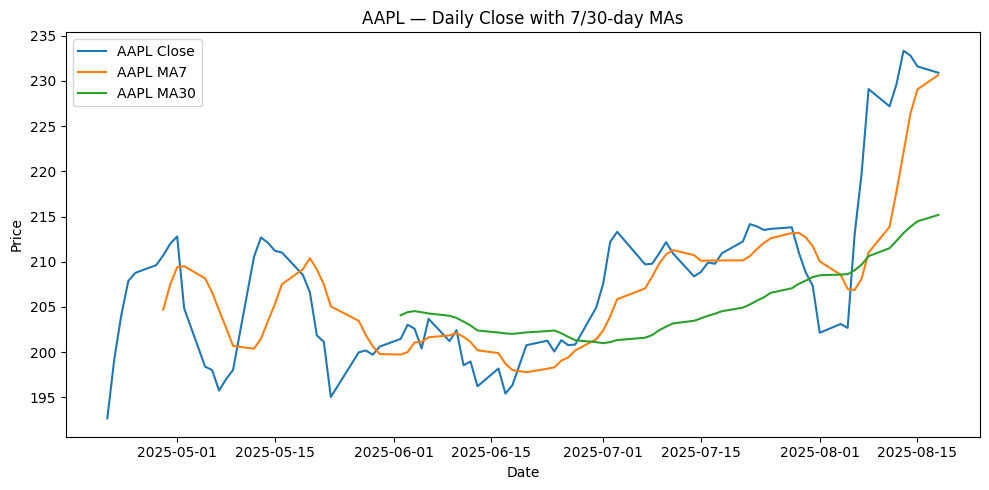

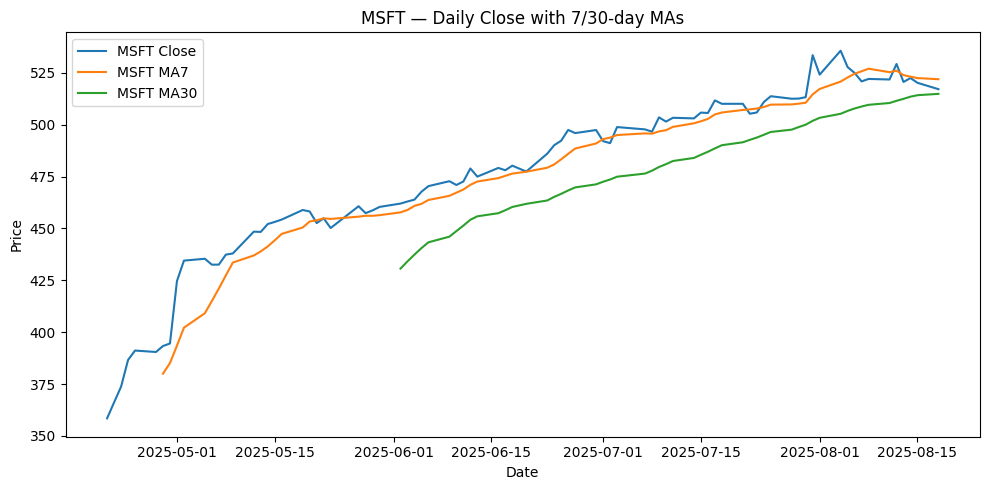

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(daily_ma.index, daily_ma["AAPL"], label="AAPL Close")
plt.plot(daily_ma.index, daily_ma["AAPL_MA7"], label="AAPL MA7")
plt.plot(daily_ma.index, daily_ma["AAPL_MA30"], label="AAPL MA30")
plt.title("AAPL — Daily Close with 7/30-day MAs")
plt.xlabel("Date"); plt.ylabel("Price")
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.plot(daily_ma.index, daily_ma["MSFT"], label="MSFT Close")
plt.plot(daily_ma.index, daily_ma["MSFT_MA7"], label="MSFT MA7")
plt.plot(daily_ma.index, daily_ma["MSFT_MA30"], label="MSFT MA30")
plt.title("MSFT — Daily Close with 7/30-day MAs")
plt.xlabel("Date"); plt.ylabel("Price")
plt.legend(); plt.tight_layout(); plt.show()


Daily Returns Summary:


Price,AAPL,MSFT
mean,0.002339,0.004562
std,0.016338,0.013184



Correlation:


Price,AAPL,MSFT
Price,,
AAPL,1.00000,0.16111
MSFT,0.16111,1.00000


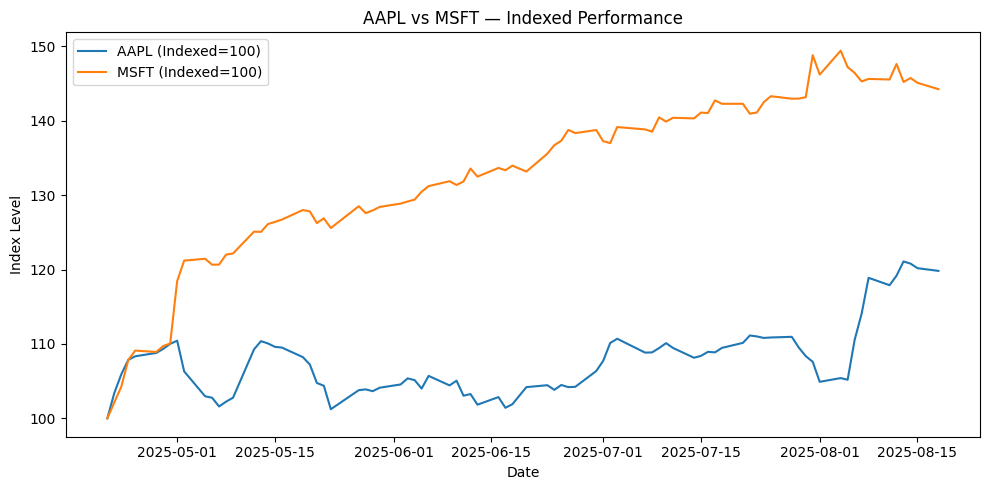

In [33]:
returns = daily.pct_change().dropna()
returns_summary = returns.agg(["mean","std"])
corr = returns.corr()

print("Daily Returns Summary:"); display(returns_summary)
print("\nCorrelation:"); display(corr)

# Indexed performance (start = 100)
norm = (daily / daily.iloc[0]) * 100.0
plt.figure(figsize=(10,5))
plt.plot(norm.index, norm["AAPL"], label="AAPL (Indexed=100)")
plt.plot(norm.index, norm["MSFT"], label="MSFT (Indexed=100)")
plt.title("AAPL vs MSFT — Indexed Performance")
plt.xlabel("Date"); plt.ylabel("Index Level")
plt.legend(); plt.tight_layout(); plt.show()


In [34]:
import os
os.makedirs("../data", exist_ok=True)
daily_ma.to_csv("../data/daily_with_MAs.csv")
weekly.to_csv("../data/weekly_close.csv")
returns.to_csv("../data/daily_returns.csv")
"Saved CSVs under ../data/"


'Saved CSVs under ../data/'